In [6]:
%precision %.2f
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)
import pandas as pd
import numpy as np
from datetime import date

import src.compute.tickets as tickets
import src.compute.changelogs as changelogs
from src.compute.utils import Interval, statuses_of_interest
from src.db.utils import SnowflakeWrapper
from src.config import data_root

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
conn = SnowflakeWrapper.create_snowflake_connection()
sw = SnowflakeWrapper(conn)

In [7]:
active_interval: Interval = Interval(
    # fromDate=date(2019, 7, 1), # year, month, day
    # toDate=date(2019, 10, 1),
    fromDate=date(2019, 10, 1), # year, month, day
    toDate=date(2020, 1, 1)
)
print("Active interval:", active_interval)

Active interval: ('2019-10-01', '2020-01-01')


In [8]:
tickets_active_on_interval = changelogs.tickets_active_on_interval(sw, active_interval)
print(f"Number of tickets active on {active_interval}: {len(tickets_active_on_interval)}")

Number of tickets active on ('2019-10-01', '2020-01-01'): 2969


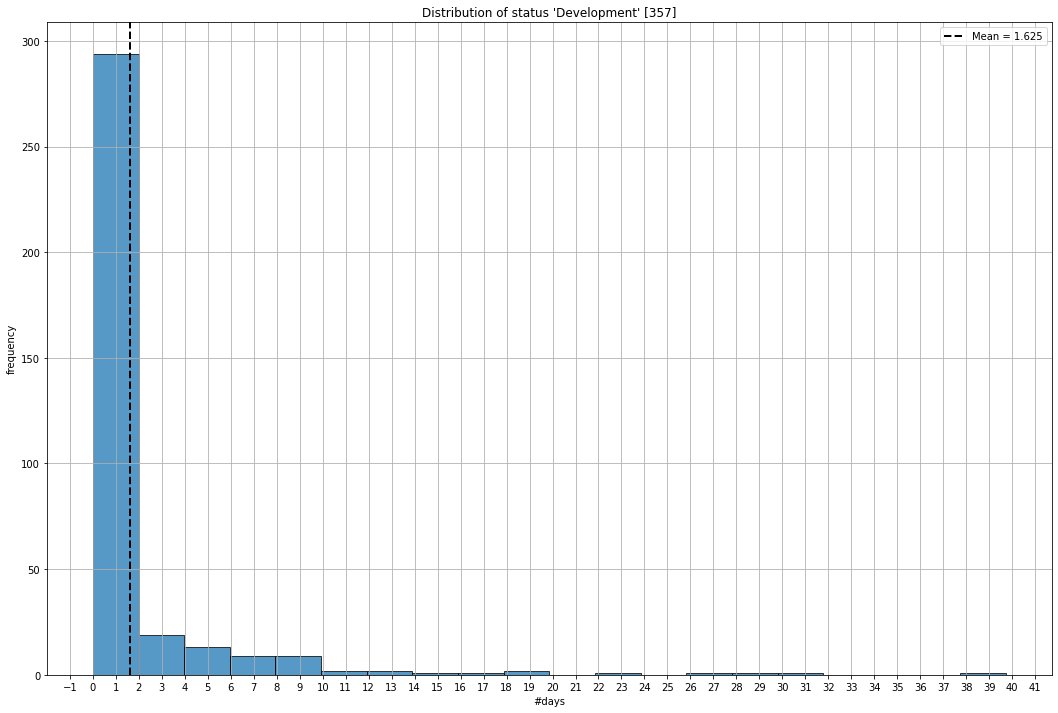

In [22]:
by_status = tickets.get_tickets_by_status(sw, active_interval)
status = "Development"
by_day = by_status[status]["AVG_DAY"]
# chosen_ticket = by_status.loc['<TICKET_ID>', :]


num_bins = 20
fig = plt.figure()
plt.hist(by_day, bins=num_bins, alpha=0.75, edgecolor='black')
plt.xticks(np.arange(np.ceil(by_day.min()) - 2,np.ceil(by_day.max()) + 2,1))
plt.axvline(by_day.mean(), color='black', linestyle='dashed', linewidth=2, label=f"Mean = {by_day.mean():.3f}")
# plt.axvline(chosen_ticket["AVG_DAY"], color='g', linestyle='dashed', linewidth=2, label=f'Chosen user = {chosen_user["AVG_DAY"]:.3f}')

plt.title(f"Distribution of status '{status}' [{len(by_day)}]")
plt.xlabel("#days")
plt.ylabel("frequency")
plt.legend()
plt.grid()
plt.savefig(f"{data_root}/figs/dev_comparison_{status}_hist.png")
plt.show()